In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

import matplotlib.pyplot as plt

In [2]:
mnist= tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [3]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train= x_train/255.0
x_test= x_test/255.0

In [4]:
model= Sequential([
    Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    # Dropout(0.2),
    Dense(10, activation='softmax')
])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
model.summary()

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8965 - loss: 0.3643 - val_accuracy: 0.9704 - val_loss: 0.0935
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9764 - loss: 0.0764 - val_accuracy: 0.9799 - val_loss: 0.0601
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9849 - loss: 0.0493 - val_accuracy: 0.9824 - val_loss: 0.0575
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9896 - loss: 0.0323 - val_accuracy: 0.9834 - val_loss: 0.0549
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9934 - loss: 0.0226 - val_accuracy: 0.9839 - val_loss: 0.0530
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9945 - loss: 0.0183 - val_accuracy: 0.9831 - val_loss: 0.0652
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9962 - loss: 0.0126 - val_accuracy: 0.9834 - val_loss: 0.0688
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9962 - loss: 0.01

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4732)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         302,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 911,528 (3.48 MB)

 Trainable params: 303,842 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 607,686 (2.32 MB)

In [6]:
test_loss, test_acc= model.evaluate(x_test, y_test)
print("loss=", test_loss)
print("accuracy=", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9785 - loss: 0.0994
loss= 0.08052393794059753
accuracy= 0.9821000099182129


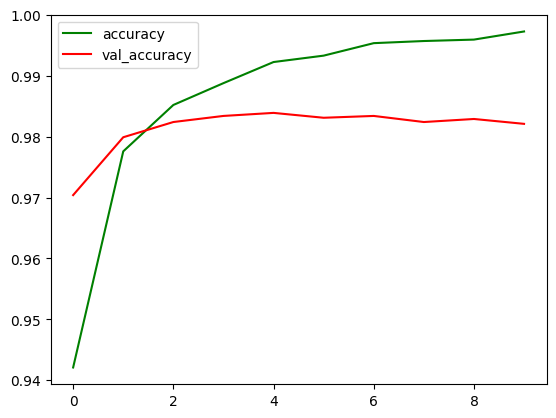

In [7]:
plt.plot(history.history['accuracy'], label='accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='val_accuracy', color='red')
plt.legend()


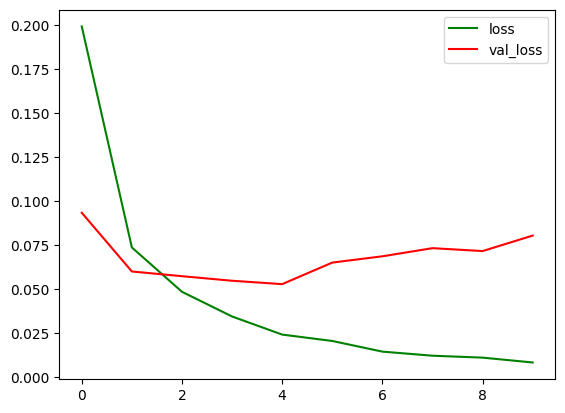

In [8]:
plt.plot(history.history['loss'], label='loss', color='green')
plt.plot(history.history['val_loss'], label='val_loss', color='red')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
actual= 9
predicted= 9


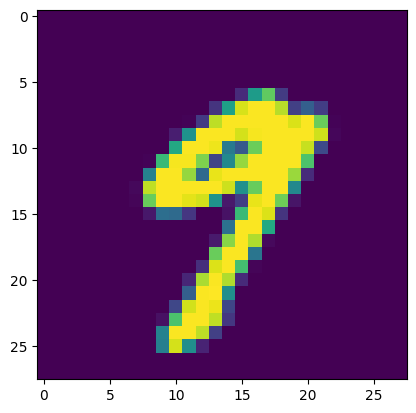

In [9]:
n=20
plt.imshow(x_test[n])
predicted_values= model.predict(x_test)
print("actual=", y_test[n])
print("predicted=", np.argmax(predicted_values[n]))